<a href="https://colab.research.google.com/github/Pager07/A-Hackers-AI-Voice-Assistant/blob/master/DataCleansingAndEda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load Data

In [4]:
import pandas as pd
import numpy as np

isMergedDatasetAvailabel = True
if not isMergedDatasetAvailabel:
  train_bodies_df = pd.read_csv('train_bodies.csv')
  train_stance_df = pd.read_csv('train_stances.csv')
  test_bodies_df = pd.read_csv('competition_test_bodies.csv')
  test_stance_df = pd.read_csv('competition_test_stances.csv')
  
  #merge the training dataframe
  train_merged = pd.merge(train_stance_df,train_bodies_df,on='Body ID',how='outer')
  test_merged = pd.merge(test_stance_df,test_bodies_df,on='Body ID', how='outer')
else:
  train_merged = pd.read_csv('train_merged.csv',index_col=0)
  test_merged = pd.read_csv('test_merged.csv',index_col=0)

In [ ]:
train_merged.head()

,Headline,Body ID,Stance,articleBody
0,police mass grave 15 body near mexico town 43 ...,712,unrelated,danny boyle direct untitled film seth rogen ey...
1,seth rogen play apple s steve wozniak,712,discuss,danny boyle direct untitled film seth rogen ey...
2,mexico police mass grave near site 43 students...,712,unrelated,danny boyle direct untitled film seth rogen ey...
3,mexico say miss students mass grave,712,unrelated,danny boyle direct untitled film seth rogen ey...
4,new ios 8 bug delete icloud document,712,unrelated,danny boyle direct untitled film seth rogen ey...


In [ ]:
test_merged.head()

,Headline,Body ID,Stance,articleBody
0,ferguson riot pregnant woman lose eye cop bean...,2008,unrelated,respect senior french police officer investiga...
1,apple store install safes secure gold apple watch,2008,unrelated,respect senior french police officer investiga...
2,pregnant woman lose eye police shoot bean bag,2008,unrelated,respect senior french police officer investiga...
3,just ferguson protester claim shoot eye rubber...,2008,unrelated,respect senior french police officer investiga...
4,police chief charge paris attack commit suicide,2008,discuss,respect senior french police officer investiga...


#Data Cleaning

In [ ]:
import re
import numpy as np

from sklearn import feature_extraction
from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

#downloads
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
wnl= nltk.WordNetLemmatizer()
def normalize(word):
  '''
  Helper function fo get_normalized_tokens()
  Takes a word and lemmatizes it eg. bats -> bat
  Args:
   word: str
  '''
  return wnl.lemmatize(word,wordnet.VERB).lower()

def get_normalized_tokens(seq):
  '''
  Takes a sentence and returns normalized tokens
  Args:
    seq: str, A sentece
  '''
  normalized_tokens = []
  for token in nltk.word_tokenize(seq):
    normalized_tokens.append(normalize(token))
  return normalized_tokens

def clean(seq):
  '''
  Takes a senetence and removes emojies, non-numerical, non-alphabetically words 
  Args:
    seq: str, A sentece
  '''
  valid = re.findall(r'\w+', seq, flags=re.UNICODE)
  seq = ' '.join(valid).lower()
  return seq

def remove_stopwords(token_list):
  '''
  Args:
    token_list: List, containg tokens
  '''
  filtered_token_list = []
  for w in token_list:
    if w not in feature_extraction.text.ENGLISH_STOP_WORDS:
      filtered_token_list.append(w)
  return filtered_token_list


def preprocess(sentence):
  '''
  This function takes in a raw body sentence|title and returns preproccesed sentence

  '''
  #Remove non-alphabatically, non-numerical,emojis etc..
  sentence = clean(sentence)
  #(normalization/lemmatization)
  tokens = get_normalized_tokens(sentence)
  #remove any stopwords
  tokens = remove_stopwords(tokens)
  sentence = ' '.join(tokens)
  return sentence







In [ ]:
train_merged['articleBody']= train_merged['articleBody'].apply(preprocess)
test_merged['articleBody'] = test_merged['articleBody'].apply(preprocess)
train_merged['Headline']=train_merged['Headline'].apply(preprocess)
test_merged['Headline']= test_merged['Headline'].apply(preprocess)

In [ ]:
train_merged.to_csv('train_merged.csv')

In [ ]:
test_merged.to_csv('test_merged.csv')

#EDA

In [ ]:
def get_top_trigrams(corpus, n=10):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus) # parameter is set for 2 (bigram)
    
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:n]



In [ ]:
#first let us check the biagram of all the data
plt.figure(figsize=(10, 5))
top_tweet_bigrams = get_top_trigrams(train_merged['Headline'],n=20)

y, x = map(list, zip(*top_tweet_bigrams))

sns.barplot(x=x, y=y)
plt.title('Biagrams (Headline)')

In [ ]:
#first let us check the biagram of all the data
plt.figure(figsize=(10, 5))
top_tweet_bigrams = get_top_trigrams(train_merged['articleBody'],n=20)

y, x = map(list, zip(*top_tweet_bigrams))

sns.barplot(x=x, y=y)
plt.title('Biagrams (articleBody)')

In [ ]:
word = 'plays'
out = normalize(word)
assert out == 'play'

text ='hello   I #like to eatsfood 123'
out = get_normalized_tokens(text)
assert out == ['hello', 'i', '#', 'like', 'to', 'eatsfood','123']

text ='.   hello   I #like to eatsfood 123 -+~@:%^&www.*😔😔'
out = clean(text);out
assert out == 'hello i like to eatsfood 123 www'

token_list = ['hello', 'i', '#', 'like', 'to', 'eatsfood','123']
out = remove_stopwords(token_list);
assert out == ['hello', '#', 'like', 'eatsfood', '123']

text ='.   hello bats,cats, alphakenny  I am #like to eatsfood 123 -+~@:%^&www.*😔😔'
out = preprocess(text); out

'hello bat cat alphakenny like eatsfood 123 www'

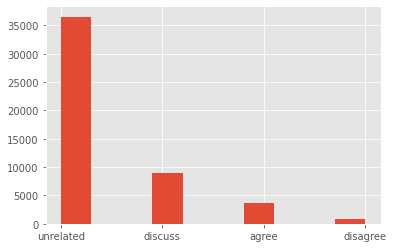

In [ ]:
#Very imblanaced
train_merged['Stance'].hist()

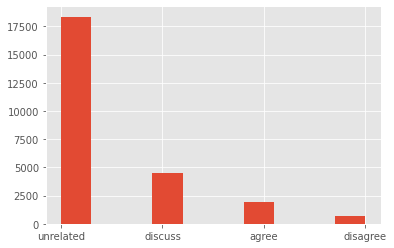

In [ ]:
test_merged['Stance'].hist()

In [ ]:
lens = train_merged['Headline'].str.len()
lens.mean(), lens.std(), lens.max()

(52.732350116065, 18.165526024059663, 160)

In [ ]:
lens = test_merged['Headline'].str.len()
lens.mean(), lens.std(), lens.max()

(51.55865108409082, 19.526854367729, 184)

In [ ]:
#The lenght seem to vary alot
lens = train_merged['articleBody'].str.len()
lens.mean(), lens.std(), lens.max()

(1357.260605939326, 1041.9401097155692, 17049)

In [ ]:
lens = test_merged['articleBody'].str.len()
lens.mean(), lens.std(), lens.max()

(1273.0960532011175, 1153.6736047697536, 12801)

#1.a tf-idf feature extraction

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import  hstack

totaldata= (train_merged['articleBody'].tolist() + train_merged['Headline'].tolist()+test_merged['articleBody'].tolist()+test_merged['Headline'].tolist())
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=80, stop_words='english')
tfidf_vect.fit(totaldata)


print('===Starting train headline====')
train_head_feature= tfidf_vect.transform(train_merged['Headline']) #(49972, 80)
print('===Starting Train body====')
train_body_feature= tfidf_vect.transform(train_merged['articleBody']) #(49972, 80)
print('===Starting Test headline====')
test_head_feature= tfidf_vect.transform(test_merged['Headline']) #(25413, 80)
print('===Starting Test articleBody====')
test_body_feature = tfidf_vect.transform(test_merged['articleBody']) #(25413, 80)

def binary_labels(label):
  if label in ['discuss', 'agree', 'disagree']:
    return 'related'
  elif label in ['unrelated']:
    return label
  else:
    assert f'{label} not found!'

train_merged_labels = train_merged['Stance'].apply(binary_labels)
test_merged_labels = test_merged['Stance'].apply(binary_labels)
print(train_merged_labels.unique(), test_merged_labels.unique())
X_train_tfidf,Y_train = hstack([train_head_feature,train_body_feature]).toarray(), train_merged_labels.values
X_test_tfidf,Y_test =  hstack([test_head_feature,test_body_feature]).toarray(),  test_merged_labels.values

===Starting train headline====
===Starting Train body====
===Starting Test headline====
===Starting Test articleBody====
['unrelated' 'related'] ['unrelated' 'related']


#Train with tf-idf features - Navie Bayes


In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc,f1_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
def binary_labels(label):
  if label in ['discuss', 'agree', 'disagree']:
    return 'related'
  elif label in ['unrelated']:
    return label
  else:
    assert f'{label} not found!'

train_merged_labels = train_merged['Stance'].apply(binary_labels)
test_merged_labels = test_merged['Stance'].apply(binary_labels)
print(train_merged_labels.unique(), test_merged_labels.unique())

['unrelated' 'related'] ['unrelated' 'related']


In [ ]:
X_train_tfidf,Y_train = hstack([train_head_feature,train_body_feature]).toarray(), train_merged_labels.values
X_test_tfidf,Y_test =  hstack([test_head_feature,test_body_feature]).toarray(),  test_merged_labels.values

In [ ]:
print(X_train_tfidf.shape,X_test_tfidf.shape )


(49972, 160) (25413, 160)


In [ ]:
train_merged['Stance'].unique()

array(['unrelated', 'discuss', 'agree', 'disagree'], dtype=object)

In [ ]:
net = MultinomialNB(alpha=0.39)
net.fit(X_train_tfidf, Y_train)
print("train score:", net.score(X_train_tfidf, Y_train))
print("validation score:", net.score(X_test_tfidf, Y_test))

train score: 0.7430561114223966
validation score: 0.7278164718844686


In [48]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.style.use('ggplot')
# Create the confussion matrix
def plot_confussion_matrix(y_test, y_pred):
    ''' Plot the confussion matrix for the target labels and predictions '''
    cm = confusion_matrix(y_test, y_pred)

    # Create a dataframe with the confussion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))

    # Plot the confussion matrix
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(df_cm, annot=True,fmt='.0f',cmap="YlGnBu",annot_kws={"size": 10})# font size
    plt.show()


# ROC Curve
# plot no skill
# Calculate the points in the ROC curve
def plot_roc_curve(y_test, y_pred):
    ''' Plot the ROC curve for the target labels and predictions'''

    enc = LabelEncoder()
    y_test = enc.fit_transform(y_test)
    y_pred = enc.fit_transform(y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc= auc(fpr,tpr)
    plt.figure(figsize=(12, 12))
    ax = plt.subplot(121)
    ax.set_aspect(1)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
# Predicting the Test set results
prediction = net.predict(X_test_tfidf)

#print the classification report to highlight the accuracy with f1-score, precision and recall
print(metrics.classification_report(prediction, Y_test))
plot_confussion_matrix(prediction, Y_test)
plot_roc_curve(prediction, Y_test)

#TF-idf Binary classification with logistice regression

Steps:
 - Create k-fold starififed dataloader [x]
   - Use Sampler to have more control over the batch
   - Write a function get_dataloaders() that will return dict of shape fold_id x tuple. The tuple contains dataloader 
 - Train the modle on all the splits [x]
    - How?
      - Write a function that will train for 1 single fold 
        - It will take the train_loader and test_loader of that split
          - These loaders can be accessed by the get_dataloaders()
- Evaluate the model 
    - Do we need to evaluate the model after each epoch?
      - Yes we need need to
        - Print the stats 
        - Track the stats
    - Use tracked stats of (fold x stats) to generate global stats 
      - What is stats, in other words what are we using to measure the performance?
        - Accurracy and F-Score??
        -  the class-wise and the macro-averaged F1scores 
          - this metrics are not affected by the large size of the majority class. 
        - What is class-wise F1score?
          - harmoic means of precison and recalls of four class
        - What is F1m meteric?
          - The macro F1 Score
            - What is macro F1 Score?
              - Draw/do compuatation across all the rows then compute average across that
        - How can we get this score?
          - Use sklearn classification report
          - set the output_dict=1
          - out['macro avg']['f1-score']
          - out['macro avg']['accuracy']
        - How will I know if the model is overfitting?
          - calcualte the test loss 

  - At last I can send the whole test set for classification
    - then plot ROC
    - confusion matrxi
  
  - What about the class weights?
    - FNC-1 paper: 
      - 0.25 reward crrectly classfiying reward R
        - 1-0.25: 0.75 (extra pentaly)
        - Total Pentatlty: 1+0.75
      - 0.25 reward crrectly classfiying reward UR
  - Train the model
    - Load the dataset
        - load the csv
        - load the X_Train,Y-train
        - load the X_text , Y_test
        - Send them into gpu
        - trian
        


        


In [10]:
from torch.utils.data import DataLoader,Dataset
import torch
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from torch.utils.data import ConcatDataset,SubsetRandomSampler
from collections import defaultdict
class TfidfBinaryStanceDataset(Dataset):
  def __init__(self, X,Y):
    '''
    Args:
      X: (samples x Features)
      Y: (samples). containing binary class eg. [1,0,1,1,....] 
    '''
    super(TfidfBinaryStanceDataset, self).__init__()
    self.x = torch.tensor(X).float()
    self.y = torch.tensor(Y).long()
  def __len__(self):
    return len(self.x)
  def __getitem__(self,idx):
    return (self.x[idx] ,self.y[idx])


def get_dataloaders(x_train,y_train,x_test,y_test,bs=256,nfold=5):
  '''
  Args:
    x_train: nd.array of shape (samples x features)
    y_train: nd.array of shape (labels )
    x_test: nd.array of shape (samples x features)
    y_test: nd.array of shape (labels )
    nfold: Scalar, number of total folds, It can't be greater than number of samples in each class
  Returns:
    loaders: Dict of shape (nfolds x 2), where the keys are fold ids and tuple containing train and test loader for 
             that split
  '''
  train_dataset = TfidfBinaryStanceDataset(x_train,y_train)
  test_dataset = TfidfBinaryStanceDataset(x_test,y_test)
  dataset = ConcatDataset([train_dataset,test_dataset]) #A big dataset
  
  kfold = StratifiedKFold(n_splits=nfold, shuffle=False)
  labels = [data[1] for data in dataset]
  loaders = defaultdict(tuple)
  for fold,(train_ids,test_ids) in enumerate(kfold.split(dataset,labels)):
    train_subsampler = SubsetRandomSampler(train_ids)
    test_subsampler = SubsetRandomSampler(test_ids)
    train_loader = torch.utils.data.DataLoader(dataset,batch_size=bs, sampler=train_subsampler) #
    test_loader = torch.utils.data.DataLoader(dataset,batch_size=bs, sampler=test_subsampler)
    loaders[fold] = (train_loader,test_loader)
  return loaders
  
  
  

  
  
  
  


In [28]:
import torch
import torch.nn as nn
from torch.optim import Adam
import numpy as np
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

class LogisticRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LogisticRegression,self).__init__()
    self.linear = nn.Linear(input_dim,output_dim)
  
  def forward(self,x):
    out = self.linear(x)
    return out

def eval_one_epoch(net,dataloader,optim,lfn,triplet_lfn,margin):
  net.eval()
  losses = []
  f1m = []
  for batch_id, (x,y) in enumerate(dataloader):
    assert len(torch.unique(y)) != 1
    x = x.to(device).float()
    y = y.to(device).long()
    hs = net(x) #(sampels x 2)
    #BCE-loss
    ce_loss = lfn(hs,y)
  
    #triplet-loss
    #generate the triplet
    probs = hs.softmax(dim=1) #(samples x 2)
    y_hat = probs.argmax(dim=1)
    anchors,positives, negatives = generate_triplets(hs,y_hat,y) #(misclassified_samples, d_model=2)
    anchors,positives, negatives = mine_hard_triplets(anchors,positives,negatives,margin) 
    triplet_loss = triplet_lfn(anchors,positives,negatives)
  
    #total-loss 
    loss = (ce_loss + triplet_loss)/2
    losses += [loss.item()]

    target_names = ['unrelated','related']
    f1m += [classification_report(y_hat.detach().cpu().numpy(),
                                  y.detach().cpu().numpy(), target_names=target_names,output_dict=1)['macro avg']['f1-score']]
  return np.mean(losses), np.mean(f1m)

 

def train_one_epoch(net,dataloader,optim,lfn,triplet_lfn,margin):
  net.train()
  losses = []
  for batch_id, (x_train,y_train) in enumerate(dataloader):
    x_train = x_train.to(device).float()
    y_train = y_train.to(device).long()
    hs = net(x_train) #(sampels x 2)
  
    #BCE-loss
    ce_loss = lfn(hs,y_train)
  
    #triplet-loss
    #generate the triplet
    probs = hs.softmax(dim=1) #(samples x 2)
    y_hat = probs.argmax(dim=1)
    anchors,positives, negatives = generate_triplets(hs,y_hat,y_train) #(misclassified_samples, d_model=2)
    anchors,positives, negatives = mine_hard_triplets(anchors,positives,negatives,margin) 
    triplet_loss = triplet_lfn(anchors,positives,negatives)
  
    #total-loss 
    loss = (ce_loss + triplet_loss)/2
    loss.backward()
    optim.step()
    optim.zero_grad()

    losses += [loss.item()]
  return sum(losses)/len(losses)

def mine_hard_triplets(anchors,positives,negatives,margin):
  '''
  Args:
    anchor: Tensor of shape (missclassified_samples x 2 )
    positive: Tensor of shape (missclassified_smaples_positive x 2)
    negative: Tensor of shape (missclassified_smaples_negative x 2)
  
  Returns:
    anchor: Tensor of shape (hard_missclassified_samples x 2 )
    positive: Tensor of shape (hard_missclassified_smaples_positive x 2)
    negative: Tensor of shape (hard_missclassified_smaples_negative x 2)
    
  '''
  #mine-semihar triplets 
  l2_dist = nn.PairwiseDistance()
  d_p = l2_dist(anchors, positives) 
  d_n = l2_dist(anchors, negatives) 
  hard_triplets = torch.where((d_n - d_p < margin))[0]

  anchors = anchors[hard_triplets]
  positives = positives[hard_triplets]
  negatives = negatives[hard_triplets]
  return anchors,positives,negatives

def generate_triplets(hs,y_hat,y):
  '''
  Args:
    hs: (Samples x 2) 
    y_hat: Tensor of shape (samples,), Containing predicted label eg. [1,0,1,1,1,1]
    y: Tensor of shape (samples,), Containing GT label eg. [1,0,1,1,1,1] 
  
  Returns:
    anchor: Tensor of shape (missclassified_samples x 2 )
    positive: Tensor of shape (missclassified_smaples_positive x 2)
    negative: Tensor of shape (missclassified_smaples_negative x 2)
  '''
  mismatch_indices = torch.where(y_hat != y)[0]
  anchors = hs[mismatch_indices] #(miscalssfied_samples x 2)
  positives = get_positives(hs,mismatch_indices,y)  #(miscalssfied_samples x 2)
  negatives = get_negatives(hs,mismatch_indices,y)
  return anchors,positives, negatives


def get_positives(hs,misclassified_indicies,y):
  '''
  For each misclassfied sample we, randomly pick 1 positive anchor
  Args:
    hs: (Samples x 2) 
    mismatch_indices: A tensor of shape [misclassified], containing row indices relatie to hs
    y: Tensor of shape (samples,), Containing GT label eg. [1,0,1,1,1,1] 
  
  Returns:
    positive: Tensor of shape [misclassified x 2]
  '''
  positives_indices = []
  negative_indices = []
  for anchor_index in misclassified_indicies:
    anchor_class = y[anchor_index]

    possible_positives = torch.where(y == anchor_class)[0]

    positive_index = anchor_index
    while anchor_index == positive_index:
      positive_index = np.random.choice(possible_positives.detach().cpu().numpy())
    positives_indices += [positive_index]
  
  positives = hs[positives_indices]
  return positives

def get_negatives(hs,misclassified_indicies,y):
  '''
  For each misclassfied sample we, randomly pick 1 negative anchor
  Args:
    hs: (Samples x 2) 
    mismatch_indices: A tensor of shape [misclassified], containing row indices relatie to hs
    y: Tensor of shape (samples,), Containing GT label eg. [1,0,1,1,1,1] 
  
  Returns:
    positive: Tensor of shape [misclassified x 2]
  '''
  negative_indices = []
  for anchor_index in misclassified_indicies:
    anchor_class = y[anchor_index]

    possible_negatives = torch.where(y != anchor_class)[0]

    negative_index = np.random.choice(possible_negatives.detach().cpu().numpy()) #possible_negatives are empty

    negative_indices += [negative_index]
  
  negatives = hs[negative_indices]
  return negatives

def save_model(net,macro_fs,fs):
  if fs>=max(macro_fs):
    torch.save(net,'./net.pth')



#TODO: Find the class wegihts 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
epoch = 20
margin= 0.5
lr = 4.33E-02
bs = 1024
nfolds = 5
enc = LabelEncoder()
x_train = X_train_tfidf
y_train =enc.fit_transform(Y_train)
x_test = X_test_tfidf
y_test = enc.fit_transform(Y_test)
def train():
  class_weights = torch.tensor([1.75,1]).to(device)
  lfn = nn.CrossEntropyLoss(weight=class_weights).to(device)
  triplet_lfn = nn.TripletMarginLoss(margin=margin).to(device)
  
  loaders = get_dataloaders(x_train,y_train,x_test,y_test,bs=bs, nfold=nfolds) #dict of shape (nfold x 2),2 because it consist of train_loader and test_loader
  macro_f1m = []
  for fold in range(nfolds):
    fold_macro_f1m =[]
    print(f'Starting training for fold:{fold}')
    net = LogisticRegression(input_dim= x_train.shape[1],
                             output_dim= 2).to(device)
    
    optim = Adam(net.parameters(), lr=lr)
    for e in range(epoch):
      train_loss = train_one_epoch(net,
                                  loaders[fold][0],
                                   optim,
                                   lfn,
                                   triplet_lfn,
                                   margin)
      eval_loss,f1m = eval_one_epoch(net,
                                    loaders[fold][1],
                                    optim,
                                    lfn,
                                    triplet_lfn,
                                    margin)
      macro_f1m += [f1m]
      fold_macro_f1m += [f1m]
      save_model(net,macro_f1m,f1m)
      if (e+1)%5==0:
        print(f'nfold:{fold},epoch:{e},train loss:{train_loss}, eval loss:{eval_loss}, fm1:{f1m}')
    print(f'Fold:{fold}, Average F1-Macro:{np.mean(fold_macro_f1m)}')
  print('=======================================')
  print(f'{nfolds}-Folds Average F1-Macro:{np.mean(macro_f1m)}')
  return np.mean(macro_f1m)



Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.31E-02


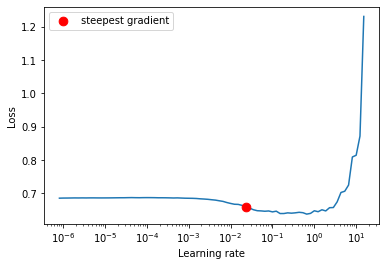

In [11]:
#Use Cyclical Learning Rates for Training Neural Networks to roughly estimate good lr 
#!pip install torch_lr_finder
from torch_lr_finder import LRFinder
loaders = get_dataloaders(x_train,y_train,x_test,y_test,bs=256, nfold=nfolds)
train_loader = loaders[0][0]
model = LogisticRegression(160,2)
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=100, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [29]:
train()

Starting training for fold:0
nfold:0,epoch:4,train loss:0.6024146110324536, eval loss:0.6200127760569255, fm1:0.41559849509023383
nfold:0,epoch:9,train loss:0.5978681485531694, eval loss:0.6050375978151957, fm1:0.4030031157333551
nfold:0,epoch:14,train loss:0.5998595609503278, eval loss:0.5948281049728393, fm1:0.407867282161874
nfold:0,epoch:19,train loss:0.5981861807532229, eval loss:0.6027443011601766, fm1:0.42075218038799256
Fold:0, Average F1-Macro:0.4127324674774284
Starting training for fold:1
nfold:1,epoch:4,train loss:0.6025787218142364, eval loss:0.6016569177309672, fm1:0.43250310569308986
nfold:1,epoch:9,train loss:0.5973691990820028, eval loss:0.6045343279838562, fm1:0.44679272166665146
nfold:1,epoch:14,train loss:0.6005635180715787, eval loss:0.5813541769981384, fm1:0.4268086770363271
nfold:1,epoch:19,train loss:0.6011431914264873, eval loss:0.5997809410095215, fm1:0.42668907904661124
Fold:1, Average F1-Macro:0.44108015002020895
Starting training for fold:2
nfold:2,epoch:4,

0.42163327959005437

#test

              precision    recall  f1-score   support

     related       0.08      0.14      0.10      4143
   unrelated       0.81      0.69      0.75     21270

    accuracy                           0.60     25413
   macro avg       0.44      0.42      0.42     25413
weighted avg       0.69      0.60      0.64     25413



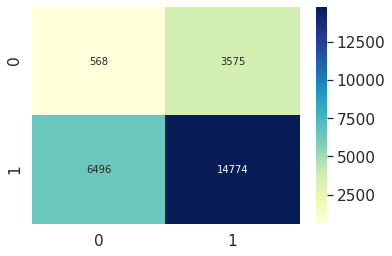

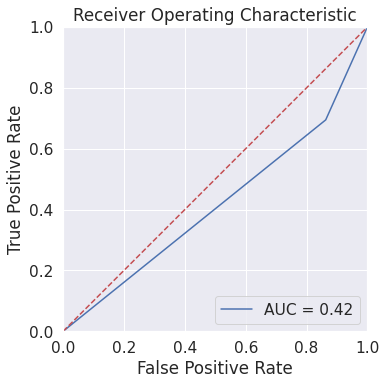

In [56]:
#net = torch.load('./net.pth')
net.eval()
x_test = torch.from_numpy(X_test_tfidf).to(device).float()
probs = net(x_test)
prediction = probs.argmax(dim=1).detach().cpu().numpy()
# #print the classification report to highlight the accuracy with f1-score, precision and recall
prediction = ['unrelated' if p else 'related' for p in prediction ]
print(metrics.classification_report(prediction, Y_test))
plot_confussion_matrix(prediction, Y_test)
plot_roc_curve(prediction, Y_test)

In [ ]:
#test for get_positives
test_hs = torch.tensor([[0.8799, 0.0234],
                        [0.2341, 0.8839],
                        [0.8705, 0.1356],
                        [0.9723, 0.1930],
                        [0.7416, 0.4498]])
test_mi = torch.tensor([0,1,2])
y = torch.tensor([0,0,1,1,1])
out = get_positives(test_hs,test_mi, y)
assert out.shape == (3,2)

#test for get_negatives
test_hs = torch.tensor([[0.8799, 0.0234],
                        [0.2341, 0.8839],
                        [0.8705, 0.1356],
                        [0.9723, 0.1930],
                        [0.7416, 0.4498]])
test_mi = torch.tensor([0,1,2])
y = torch.tensor([0,0,1,1,1])
out = get_negatives(test_hs,test_mi, y)
assert out.shape == (3,2)


#test for generate_triplets
test_hs = torch.tensor([[0.8799, 0.0234],
                        [0.2341, 0.8839],
                        [0.8705, 0.1356],
                        [0.9723, 0.1930],
                        [0.7416, 0.4498]])
y_hat = torch.tensor([1,1,1,1,1]) #
y = torch.tensor([1,1,1,0,0])
a,p,n = generate_triplets(test_hs,y_hat,y)
assert a.shape == (2,2)
assert p.shape == (2,2)
assert n.shape == (2,2)

#test for mine_hard_triplets
a = torch.tensor([[0.8799, 0.0234],
                  [0.2341, 0.8839],
                  [0.7416, 0.4498]])
p = torch.tensor([[0.8799, 0.0234],
                  [0.2341, 0.8839],
                  [0.7416, 0.4498]])

n = torch.tensor([[0.8799, 0.0234],
                  [0.2341, 0.8839],
                  [0.7416, 0.4498]])
h_a , h_p ,h_n= mine_hard_triplets(a,p,n,0.5)
assert h_a.shape == (3,2)
assert h_p.shape == (3,2)
assert h_n.shape == (3,2)

x_train = torch.tensor([[0.8799, 0.0234],
                  [0.2341, 0.8839],
                  [0.7416, 0.4498]])
y_train = [1,1,0]
x_test = torch.tensor([[0.8799, 0.0234],
                  [0.2341, 0.8839],
                  [0.7416, 0.4498]])
y_test = [1,1,0,0]
loader = get_dataloaders(x_train,y_train,x_test,y_test,bs=1,nfold=2)
assert len(loader) == 2

In [ ]:
for k,(train_loader,test_loader) in loader.items():
  print(loaders)
  for x,y in train_loader:
    print(x.shape)
    print(y.shape)


torch.Size([1, 2])
torch.Size([1])
torch.Size([1, 2])
torch.Size([1])
torch.Size([1, 2])
torch.Size([1])
torch.Size([1, 2])
torch.Size([1])
torch.Size([1, 2])
torch.Size([1])
torch.Size([1, 2])
torch.Size([1])


In [ ]:
x ,y  = loader[0]